**Scenario 2**


An online fashion retailer wants to develop a machine learning model that can classify
customer reviews into different sentiment categories. The model will take as input a
customer review and output a prediction of the review's sentiment, such as positive,
negative, or neutral. Develop a ML model for aforesaid classification with an example
Dataset.

Import libriaries and data

In [11]:
import pandas as pd  # Import the pandas library for data manipulation.
import numpy as np  # Import the numpy library for numerical operations.
import matplotlib.pyplot as plt  # Import matplotlib for data visualization.
%matplotlib inline
import seaborn as sns  # Import the seaborn library for data visualization with a higher-level interface.
import re  # Import the regular expression library for text processing.
import string  # Import the string library for string-related operations.
from wordcloud import WordCloud  # Import the WordCloud library for creating word clouds.
import nltk  # Import the Natural Language Toolkit (NLTK) for natural language processing.
from nltk.corpus import stopwords  # Import NLTK's stopwords for text preprocessing.
from nltk.tokenize import sent_tokenize, word_tokenize  # Import NLTK's tokenization functions.
from nltk.stem.wordnet import WordNetLemmatizer  # Import NLTK's lemmatization function.
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting the dataset.
from imblearn.pipeline import Pipeline as imbpipeline  # Import the imbalanced-learn pipeline.
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer  # Import text vectorization tools.
from imblearn.over_sampling import SMOTE  # Import SMOTE for oversampling.
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression for classification.
from sklearn.naive_bayes import MultinomialNB  # Import Multinomial Naive Bayes for classification.
from sklearn.linear_model import SGDClassifier  # Import Stochastic Gradient Descent Classifier.
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier.
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoost Classifier.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report  # Import evaluation metrics.
import pickle  # Import the pickle library for saving and loading Python objects.
import warnings  # Import the warnings library.
warnings.simplefilter('ignore')  # Set up a filter to ignore warnings.

Mounting Drive

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Dataset

In [13]:
df = pd.read_csv('/content/drive/MyDrive/DRDO Scenario Dataset/Womens Clothing E-Commerce Reviews.csv', header=0,index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [15]:
df.shape

(23486, 10)

In [16]:
#type of variables
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

<Axes: xlabel='count'>

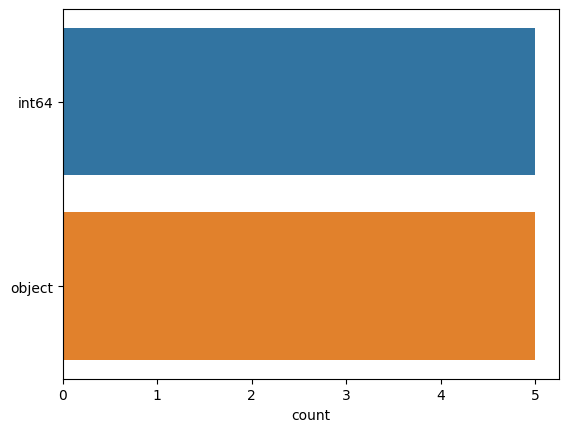

In [17]:
sns.countplot(data=df,y=df.dtypes)

Checking the missing values in data:

In [18]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

### Data cleaning



The dataset contains several variables such as Age, Title, Ratiing, Positive Feedback Count, Division Name, Department Name and Class name. In this case we used only two variables Review Text and Recommended IND as a predictor and target class variable.

**Review Text** is a review from customers and will be used as predictor variable.

**Recommended** is a recommendation from customers, where the product  1 is recommended, 0 is not recommended and  will be used as target variable.

In [19]:
data = df[['Review Text', 'Rating']]
data.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


Rename columns:

In [20]:
data = data.rename(columns={"Rating": "Class", "Review Text": "Review"})
data.head()

,Review,Class
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [21]:
data = pd.DataFrame(data)


In [22]:
print(data['Class'])

0        4
1        5
2        3
3        5
4        5
        ..
23481    5
23482    3
23483    3
23484    3
23485    5
Name: Class, Length: 23486, dtype: int64


In [23]:
data['Class'] = np.where(data['Class'] <= 2, -1, data['Class'])
data['Class'] = np.where(data['Class'] == 3, 0, data['Class'])
data['Class'] = np.where(data['Class'] >= 4, 1, data['Class'])


print(data)

                                                  Review  Class
0      Absolutely wonderful - silky and sexy and comf...      1
1      Love this dress!  it's sooo pretty.  i happene...      1
2      I had such high hopes for this dress and reall...      0
3      I love, love, love this jumpsuit. it's fun, fl...      1
4      This shirt is very flattering to all due to th...      1
...                                                  ...    ...
23481  I was very happy to snag this dress at such a ...      1
23482  It reminds me of maternity clothes. soft, stre...      0
23483  This fit well, but the top was very see throug...      0
23484  I bought this dress for a wedding i have this ...      0
23485  This dress in a lovely platinum is feminine an...      1

[23486 rows x 2 columns]


In [24]:
data['Review'][96]

'I usually wear a medium and bought a small. it fit ok, but had no shape and was not flattering. i love baby doll dresses and tops, but this was a tent. my daughter saw me try it on and said "that\'s a piece of tablecloth." it\'s going back.'

Delate missing values:

In [25]:
data.dropna(subset=['Review'], inplace=True)

In [26]:
data.isnull().sum()

Review    0
Class     0
dtype: int64

In [27]:
data['Review'] = data['Review'].astype(str)

In [28]:
data.shape

(22641, 2)

### Basic data analysis

Checking Proportion Target Class Variable:

In [29]:
data['Class'].value_counts()

 1    17448
 0     2823
-1     2370
Name: Class, dtype: int64

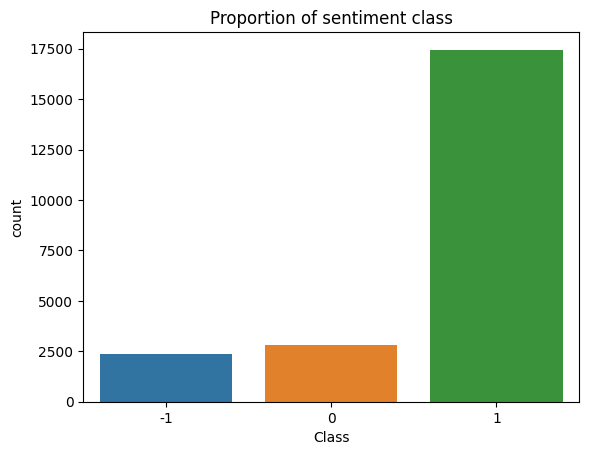

In [30]:
sns.countplot(x='Class',data=data)
plt.xlabel('Class')
plt.title('Proportion of sentiment class');

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

Length of text messages:

In [31]:
data['length'] = data['Review'].apply(len)
data.head()

,Review,Class,length
0,Absolutely wonderful - silky and sexy and comf...,1,53
1,Love this dress! it's sooo pretty. i happene...,1,303
2,I had such high hopes for this dress and reall...,0,500
3,"I love, love, love this jumpsuit. it's fun, fl...",1,124
4,This shirt is very flattering to all due to th...,1,192


Histogram of reviews length:

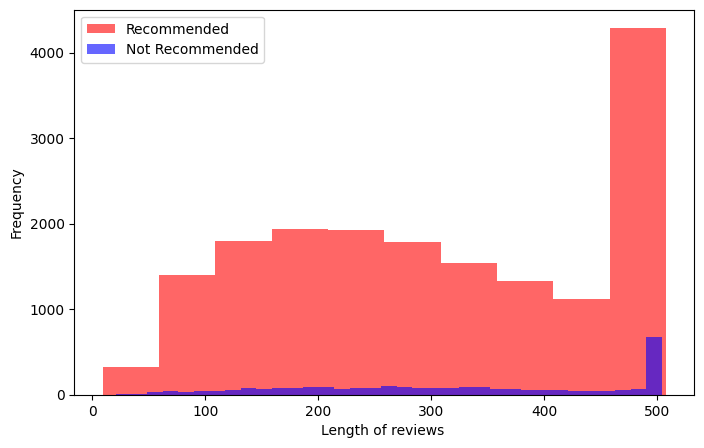

In [32]:
plt.figure(figsize=(8, 5))
data[data.Class == 1].length.plot(kind='hist', color='red', label='Recommended', alpha=0.6)
data[data.Class == 0].length.plot(bins=35, kind='hist', color='blue', label='Not Recommended', alpha=0.6)
plt.legend()
plt.xlabel("Length of reviews ");

The largest reviews has over 500 characters, some of them are very short.


In this step we change text to tokens and convertion all of the words to lower case.  Next we remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.

The function to remove punctuation and change to **tokens**:

In [33]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()
    return " ".join(text)

In [34]:
# Show some stop words
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words[::10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
#clothing stopwords
# Stop words
#First we extracting the stopwords from nltk library, then we adding some clothing stopwords and build function to remove stop words:

clothes =['dress','color','wear','top','sweater','material','shirt','jeans','pant',
          'skirt','order','white','black','fabric','blouse','sleeve','even', 'jacket']

In [36]:
def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words and word.lower() not in clothes]
    return " ".join(text)

**Removing all numbers (weight, size etc.)**

We remove numbers from text, since numbers doesn't give much importance to get the main words:

In [37]:
def remove_numbers(text):
    new_text = []
    for word in text.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)

**Normalization**

The next step is the normalization of words in the corpus by transform all of different forms of the word into one. The two methods that exist for this purpose are Stemming and Lemmatization. We used the Lemmatization one.

In [38]:
lem = WordNetLemmatizer()

def lemmatize(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [69]:
def preprocess(text):
  text=tokens(text)
  text=stopwords(text)
  text=remove_numbers(text)
  text=lemmatize(text)
  return text


Apply all functions to data:

In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [41]:
data['Review'] = data['Review'].apply(tokens)
data['Review'] = data['Review'].apply(stopwords)
data['Review'] = data['Review'].apply(remove_numbers)
data['Review'] = data['Review'].apply(lemmatize)

In [42]:
data.head()

,Review,Class,length
0,absolutely wonderful silky sexy comfortable,1,53
1,love sooo pretty happened find store glad bc n...,1,303
2,high hope really wanted work initially ordered...,0,500
3,love love love jumpsuit fun flirty fabulous ev...,1,124
4,flattering due adjustable front tie perfect le...,1,192


In [43]:
data['Review'][1]

'love sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite'



Now we create a Word Clouds for reviews, representing most common words in each target class.

Word cloud is a excellent way to represent text data, where the size and color of each word appears in the wordcloud show its frequency or importance.

In [44]:
positive = data[data.Class == 1]
negative = data[data.Class == -1]
neutral = data[data.Class == 0]
positive.head()

,Review,Class,length
0,absolutely wonderful silky sexy comfortable,1,53
1,love sooo pretty happened find store glad bc n...,1,303
3,love love love jumpsuit fun flirty fabulous ev...,1,124
4,flattering due adjustable front tie perfect le...,1,192
6,aded basket hte last mintue see would look lik...,1,496


In [45]:
negative.head()

,Review,Class,length
5,love tracy reese dress one petite foot tall us...,-1,488
22,first pullover styling side zipper purchased k...,-1,437
26,waiting coat ship week excited arrive coat tru...,-1,500
33,ordered month ago finally came back huge disap...,-1,443
56,pregnant thought would great sleep bra soft fi...,-1,428


In [46]:
neutral.head()

,Review,Class,length
2,high hope really wanted work initially ordered...,0,500
10,run small esp zipper area run ordered sp typic...,0,336
14,nice choice holiday gathering like length graz...,0,500
16,nice leg opening large length hit right ankle ...,0,359
23,cute little fit tt little high waisted good le...,0,202


In [47]:
positive_words =[]

for review in positive.Review:
    positive_words.append(review)
positive_words = ' '.join(positive_words)
positive_words[:48]

'absolutely wonderful silky sexy comfortable love'

In [48]:
negative_words = []

for review in negative.Review:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:455]

'love tracy reese dress one petite foot tall usually p brand pretty package lot long full overwhelmed small frame stranger alteration shortening narrowing would take away embellishment garment love idea style work returned first pullover styling side zipper purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath look like described sadly returning sure find something exchange wa'

In [49]:
neutral_words = []

for review in neutral.Review:
    neutral_words.append(review)
neutral_words = ' '.join(neutral_words)
neutral_words[:455]

'high hope really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c run small esp zipper area run ordered sp typically fit tight look feel cheap pulling cause rip pretty disappointed going christmas year needle say going back nice '

**Most Common words in positive Review**

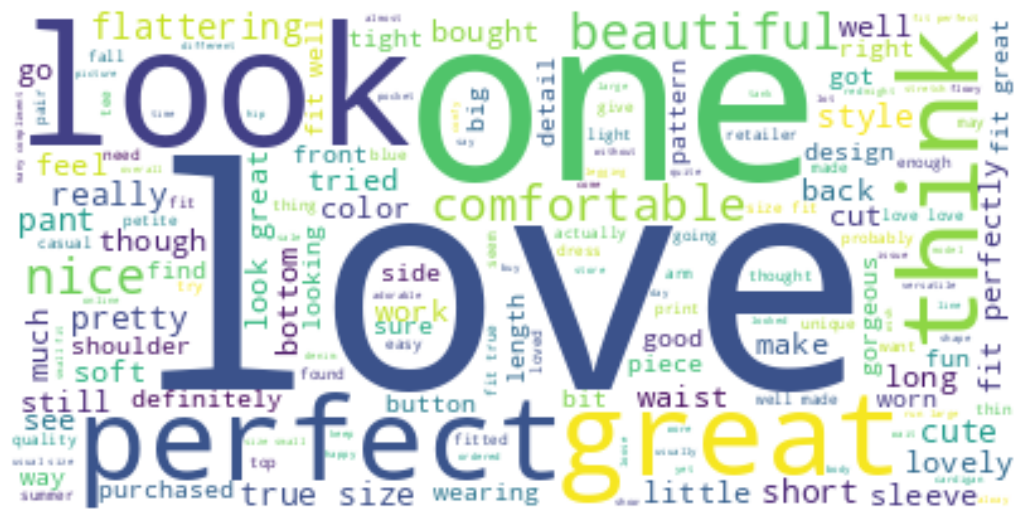

In [50]:
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Most Common words in Negative Review**

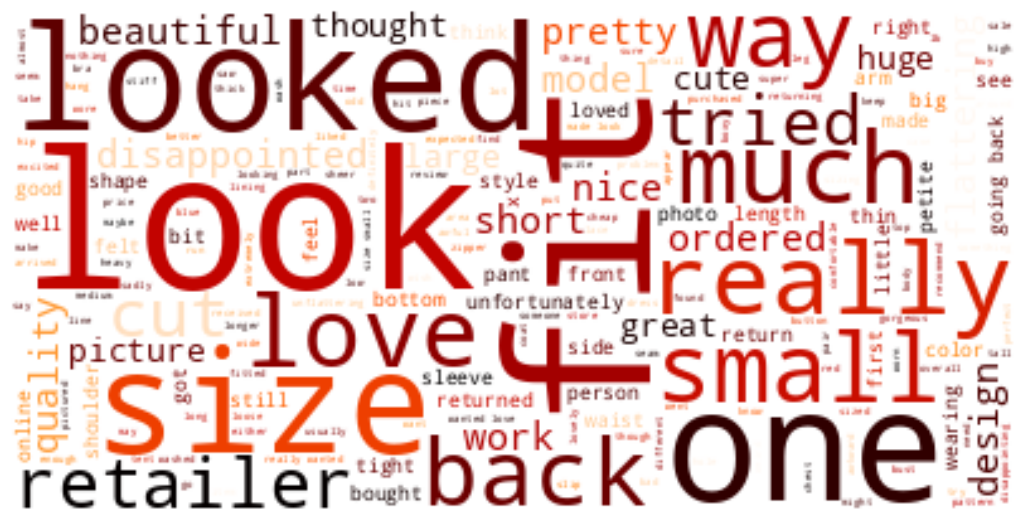

In [51]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Most Common words in Neutral Review**

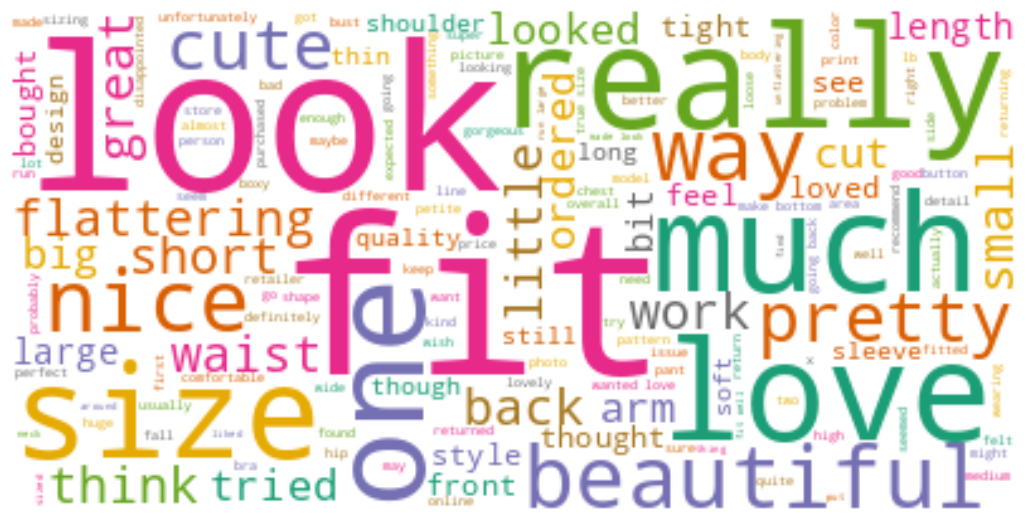

In [52]:
wordcloud = WordCloud(background_color="white", max_words=len(neutral_words), colormap='Dark2')
wordcloud.generate(neutral_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



Now we split dataset into train and test dataset:


In [53]:
X = data['Review']
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

Logistics Regression

In [54]:
model_log = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                               ('tfidf', TfidfTransformer()),
                               ('smote', SMOTE()),
                               ('clf', LogisticRegression())])

model_log.fit(X_train, y_train)

ytest = np.array(y_test)
predictions = model_log.predict(X_test)

In [73]:
print(X_test)

8620     beautiful versatile extremely forgiving post b...
6873                   anything like closet really excited
11820    cute button tiny one cracked half could put ri...
10137    bought store going home trying promptly went o...
9016     love paisley print soft comfy flutter look cut...
                               ...                        
12691    high hope fit really strange ordered usual siz...
14809    great casual confusing fit know want understan...
18929    wide leg crop cool trend great pretty standard...
9445     become go work staple closet soft relaxed fit ...
20312    pretty tulle underskirt fun surprise subtle st...
Name: Review, Length: 5661, dtype: object


pandas.core.series.Series

In [55]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(ytest, predictions))

accuracy 0.7904963787316729
              precision    recall  f1-score   support

          -1       0.49      0.53      0.51       612
           0       0.37      0.40      0.38       757
           1       0.92      0.90      0.91      4292

    accuracy                           0.79      5661
   macro avg       0.59      0.61      0.60      5661
weighted avg       0.80      0.79      0.80      5661



Naive Bayes

In [56]:
model_nb = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                              ('tfidf', TfidfTransformer()),
                               ('smote', SMOTE()),
                               ('clf', MultinomialNB())])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

In [57]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.7714184773008302
              precision    recall  f1-score   support

          -1       0.47      0.58      0.52       612
           0       0.36      0.51      0.42       757
           1       0.95      0.85      0.89      4292

    accuracy                           0.77      5661
   macro avg       0.59      0.64      0.61      5661
weighted avg       0.82      0.77      0.79      5661



Stochastic Gradient Descent

In [58]:
model_sg = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                              ('tfidf', TfidfTransformer()),
                              ('smote', SMOTE()),
                              ('clf',  SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42))])


model_sg.fit(X_train, y_train)

ytest = np.array(y_test)
y_predict = model_sg.predict(X_test)

In [59]:
print('accuracy %s' % accuracy_score(y_predict, y_test))
print(classification_report(ytest, y_predict))

accuracy 0.8002119766825649
              precision    recall  f1-score   support

          -1       0.46      0.65      0.54       612
           0       0.41      0.20      0.27       757
           1       0.90      0.93      0.91      4292

    accuracy                           0.80      5661
   macro avg       0.59      0.59      0.58      5661
weighted avg       0.79      0.80      0.79      5661



Random Forest

In [60]:
model_rf = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                              ('tfidf', TfidfTransformer()),
                              ('smote', SMOTE()),
                              ('clf',  RandomForestClassifier(n_estimators=50))])


model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_rf.predict(X_test)

In [61]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.7880233174350821
              precision    recall  f1-score   support

          -1       0.57      0.29      0.38       612
           0       0.38      0.09      0.15       757
           1       0.81      0.98      0.89      4292

    accuracy                           0.79      5661
   macro avg       0.59      0.45      0.47      5661
weighted avg       0.73      0.79      0.74      5661



Ada  Boosting

In [62]:
ada = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                         ('tfidf', TfidfTransformer()),
                         ('smote', SMOTE()),
                         ('clf',  AdaBoostClassifier())])


ada.fit(X_train, y_train)

ytest = np.array(y_test)
ada_pred = ada.predict(X_test)

In [63]:
print('accuracy %s' % accuracy_score(ada_pred, y_test))
print(classification_report(ytest, ada_pred))

accuracy 0.7548136371665783
              precision    recall  f1-score   support

          -1       0.43      0.43      0.43       612
           0       0.31      0.30      0.30       757
           1       0.88      0.88      0.88      4292

    accuracy                           0.75      5661
   macro avg       0.54      0.54      0.54      5661
weighted avg       0.75      0.75      0.75      5661



We can write a function to build and calculates our all models by using a pipeline as follows:

In [64]:
def calculate_models(X_train, X_test, y_train, y_test):
    ''' Calculating models with score '''
    models = pd.DataFrame()
    classifiers = [
        LogisticRegression(),
        MultinomialNB(),
        SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42),
        RandomForestClassifier(n_estimators=50),
        AdaBoostClassifier(),]

    for classifier in classifiers:
        pipeline = imbpipeline(steps=[('vect', CountVectorizer(
                                min_df=5, ngram_range=(1, 2))),
                                      ('tfidf', TfidfTransformer()),
                                      ('smote', SMOTE()),
                                      ('classifier', classifier)])
        pipeline.fit(X_train, y_train)
        score = pipeline.score(X_test, y_test)
        param_dict = {
                      'Model': classifier.__class__.__name__,
                      'Score': score
                     }
        models = models.append(pd.DataFrame(param_dict, index=[0]))

    models.reset_index(drop=True, inplace=True)
    print(models.sort_values(by='Score', ascending=False))

In [65]:
calculate_models(X_train, X_test, y_train, y_test)

                    Model     Score
2           SGDClassifier  0.799152
0      LogisticRegression  0.789966
3  RandomForestClassifier  0.788553
1           MultinomialNB  0.769122
4      AdaBoostClassifier  0.756933


**Which one is the best Model?**

In [66]:
log_acc = accuracy_score(predictions, y_test)
nb_acc = accuracy_score(pred_y, y_test)
sg_acc = accuracy_score(y_predict, y_test)
rf_acc = accuracy_score(pred, y_test)
ada_acc = accuracy_score(ada_pred, y_test)

In [67]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Descent', 'Random Forest', 'AdaBoosting'],
                      'Score': [log_acc, nb_acc, sg_acc, rf_acc, ada_acc]})
print(round(models.sort_values(by='Score', ascending=False), 2))

                         Model  Score
2  Stochastic Gradient Descent   0.80
0          Logistic Regression   0.79
3                Random Forest   0.79
1                  Naive Bayes   0.77
4                  AdaBoosting   0.75


In [68]:
# Save the best model
with open("sentiment_model.pkl", "wb") as model_file:
    pickle.dump(model_log, model_file)

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. We have used SMOTE method to resolve the imbalance problem in our data. Then we started training 5 different classification models and we got the best accuracy of 89 % for Logistic Regression model.

Implementation


In [ ]:
rev = input("Enter the review ")
rev = preprocess(rev)
result = model_log.predict([rev])
if(result == 0):
  print("Neutral")
elif result >0:
  print("Positive")
else:
  print("Negative")